In [ ]:
# vortex is a momentum / trend indicator created in 2009, see this article https://www.investopedia.com/terms/v/vortex-indicator-vi.asp
# VP from NNFX likes it for FX and Stonehill FX also did their own testing of it: https://stonehillforex.com/2022/07/vortex-indicator-as-a-confirmation-indicator/
# I backested it using Backtesting.py on 3 different data sets, SPY weekly, GSG weekly and EURUSD 1h.
# The weekly datasets were downloaded from Alpha Vantage and the hourly dataset was downloaded from a Amp Futures MT5 terminal.
# The 2 weekly datasets backtested ok but I am still a novice, sharpe ratios for both were 1.8-1.9. Overfitting might be at play here.
# The last backtest on EURUSD data did very poorly and although I have a few ideas as to the cause, I don't know for sure.

In [1]:
from backtesting import Backtest, Strategy
import matplotlib.pyplot as plt
import pandas as pd
import pandas_ta as ta

C:\Users\k0240\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [192]:
df = pd.read_csv('./data/av_eurusd_daily.csv')
df.set_index('timestamp', inplace=True)
df.index = pd.to_datetime(df.index)
df.columns= df.columns.str.capitalize()
df.sort_index(inplace=True)
df.ta.vortex(length=30, append=True)
df['kama'] = ta.kama(df['Close'], length=28, fast=2, slow=30, drift=1, append=True)
df['chop'] = ta.chop(df['High'], df['Low'], df['Close'], length=21, atr_length=1.5, scalar=None, drift=None, append=True)
df['er'] = ta.er(df['Close'], length=28, append=True)
df['atr_14'] = ta.atr(df['High'], df['Low'], df['Close'])
df['atr_1_5_high'] = df['Close'] + (df['atr_14'] * 1.5)
df['atr_1_5_low'] = df['Close'] - (df['atr_14'] * 1.5)
df['atr_3_high'] = df['Close'] + (df['atr_14'] * 3)
df['atr_3_low'] = df['Close'] - (df['atr_14'] * 3)

df.rename(columns={'VTXM_30': 'vortex_short','VTXP_30':'vortex_long'}, inplace=True)
df = df.tail(730)

In [187]:
df

,Open,High,Low,Close,vortex_long,vortex_short,kama,chop,er,atr_14,atr_1_5_high,atr_1_5_low,atr_3_high,atr_3_low
timestamp,,,,,,,,,,,,,,
2021-02-01,117.665,117.726,116.920,116.960,1.022380,0.955983,116.583819,63.229903,0.049530,0.613665,117.880497,116.039503,118.800994,115.119006
2021-02-02,116.960,117.239,116.840,116.953,1.019087,0.974359,116.589455,61.933917,0.098060,0.598331,117.850497,116.055503,118.747994,115.158006
2021-02-03,116.937,117.020,116.700,116.794,1.025118,0.972498,116.591925,61.667912,0.075342,0.578451,117.661676,115.926324,118.529352,115.058648
2021-02-04,116.802,116.881,116.580,116.676,1.020981,0.987221,116.592291,60.495429,0.002458,0.558633,117.513949,115.838051,118.351898,115.000102
2021-02-05,116.651,117.242,116.640,117.199,1.025615,0.949004,116.595139,61.084070,0.006630,0.561730,118.041596,116.356404,118.884191,115.513809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-13,167.901,168.396,167.500,168.249,1.133738,0.878870,165.839878,59.798022,0.400674,1.009425,169.763137,166.734863,171.277274,165.220726
2023-11-14,168.243,169.398,168.060,169.109,1.254055,0.808848,166.178623,52.232228,0.427441,1.032894,170.658341,167.559659,172.207683,166.010317
2023-11-15,169.098,170.500,168.858,170.416,1.222974,0.763224,166.615236,45.283453,0.425940,1.076402,172.030603,168.801397,173.645206,167.186794


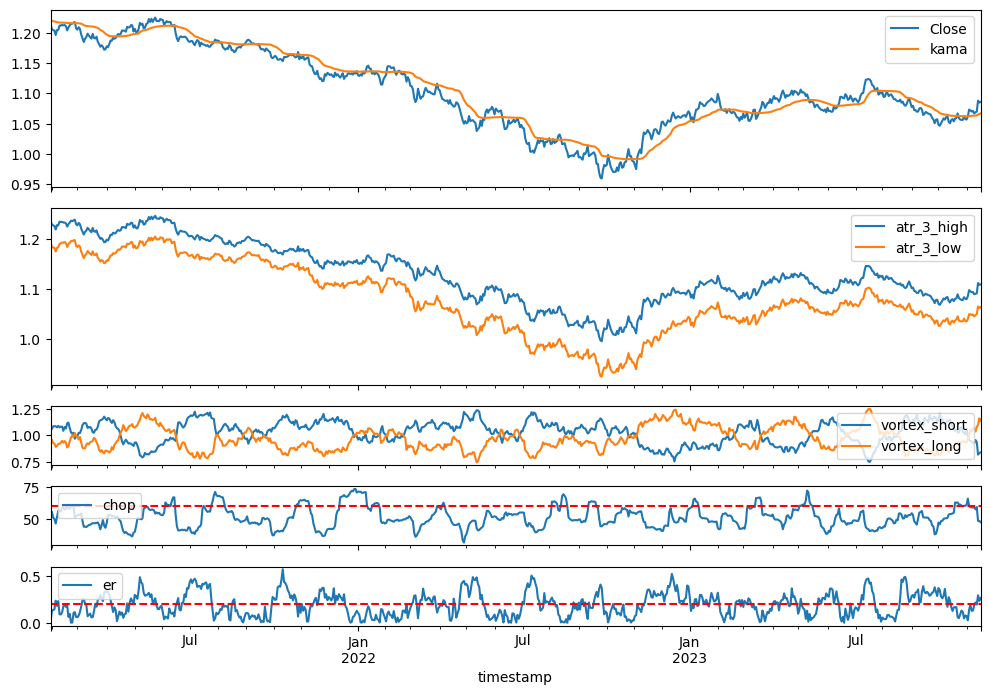

In [198]:
# create chart with vortex subplots

fig, axs = plt.subplots(5, sharex=True, gridspec_kw={'height_ratios': [3, 3, 1, 1, 1]}, figsize=(12,8))

df[['Close', 'kama']].plot(ax=axs[0])

df[['atr_3_high', 'atr_3_low']].plot(ax=axs[1])

df[['vortex_short','vortex_long']].plot(ax=axs[2])

df[['chop']].plot(ax=axs[3])
axs[3].axhline(60, color='r', linestyle='--')

df[['er']].plot(ax=axs[4])
axs[4].axhline(0.2, color='r', linestyle='--')


plt.show()

In [200]:
class VortexTrend(Strategy):

  def init(self):
    self.vortex_long = self.data.vortex_long
    self.vortex_short = self.data.vortex_short
    self.kama = self.data.kama
    self.close = self.data.Close
    self.er = self.data.er
    self.chop = self.data.chop
    self.atr_1_5_high = self.data.atr_1_5_high
    self.atr_1_5_low = self.data.atr_1_5_low

  def next(self):
    if not self.position:
      if self.data.vortex_long > self.data.vortex_short \
        and self.data.Close > self.data.kama \
          and self.data.er > .2 \
            and self.data.chop < 65:
        self.buy(size=.02, sl=self.data.atr_3_low)
      if self.data.vortex_long < self.data.vortex_short \
        and self.data.Close < self.data.kama \
          and self.data.er > .2 \
            and self.data.chop < 65:
        self.sell(size=.02, sl=self.data.atr_3_high)
    else:
      if (self.position.is_long and self.data.vortex_long <= self.data.vortex_short) \
      or (self.position.is_short and self.data.vortex_long >= self.data.vortex_short) \
      or (self.position.is_long and self.data.Close <= self.data.kama) \
      or (self.position.is_short and self.data.Close >= self.data.kama):
        self.position.close(portion=.5)
        for trade in self.trades:
          trade.sl = trade.entry_price     

bt = Backtest(df, VortexTrend, cash=100_000, commission=.002)
stats = bt.run()
print(stats)

Start                     2021-01-29 00:00:00
End                       2023-11-16 00:00:00
Duration                   1021 days 00:00:00
Exposure Time [%]                   77.671233
Equity Final [$]                 99996.844598
Equity Peak [$]                 100060.152384
Return [%]                          -0.003155
Buy & Hold Return [%]              -10.538719
Return (Ann.) [%]                   -0.001089
Volatility (Ann.) [%]                0.109827
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                   -0.118459
Avg. Drawdown [%]                   -0.053381
Max. Drawdown Duration      462 days 00:00:00
Avg. Drawdown Duration      127 days 00:00:00
# Trades                                   67
Win Rate [%]                         77.61194
Best Trade [%]                       5.575695
Worst Trade [%]                     -1.895007
Avg. Trade [%]                    

In [201]:
bt.plot()

c:\Users\k0240\.conda\envs\general_quant_env\Lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
c:\Users\k0240\.conda\envs\general_quant_env\Lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
c:\Users\k0240\.conda\envs\general_quant_env\Lib\site-packages\backtesting\_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
c:\Users\k0240\.conda\envs\general_quant_env\Lib\site-packages\backtesting\_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(


GridPlot(id='p4538', ...)

In [63]:
class Vortex_1(Strategy):

  def init(self):
    self.vtxm = self.data.vtxm
    self.vtxp = self.data.vtxp
    self.vortex_d = self.data.vortex_d
    self.ema_vortex_d = self.data.ema_vortex_d
    self.ema = self.data.ema
    self.chop = self.data.chop
    self.close = self.data.Close
    
  def next(self):
    if not self.position:
      if self.data.vtxp > self.data.vtxm \
        and self.data.Close > self.data.ema \
          and self.data.chop < 50:
        self.buy()
      if self.data.vtxp < self.data.vtxm \
        and self.data.Close < self.data.ema \
          and self.data.chop < 50:
        self.sell()
    else:
      if (self.position.is_long and self.data.vtxp < self.data.vtxm) \
      or (self.position.is_short and self.data.vtxp > self.data.vtxm):
        self.position.close()

bt = Backtest(df, Vortex_1, cash=50_000, commission=.002)
stats = bt.run()
bt.plot()
print(stats)

c:\Users\k0240\.conda\envs\general_quant_env\Lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
c:\Users\k0240\.conda\envs\general_quant_env\Lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
c:\Users\k0240\.conda\envs\general_quant_env\Lib\site-packages\backtesting\_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
c:\Users\k0240\.conda\envs\general_quant_env\Lib\site-packages\backtesting\_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(


Start                     2022-06-24 00:00:00
End                       2023-11-16 00:00:00
Duration                    510 days 00:00:00
Exposure Time [%]                   78.356164
Equity Final [$]                 50660.375272
Equity Peak [$]                  51538.565288
Return [%]                           1.320751
Buy & Hold Return [%]                2.872844
Return (Ann.) [%]                    0.910007
Volatility (Ann.) [%]                7.224002
Sharpe Ratio                          0.12597
Sortino Ratio                        0.189855
Calmar Ratio                         0.122573
Max. Drawdown [%]                    -7.42418
Avg. Drawdown [%]                   -2.095531
Max. Drawdown Duration      321 days 00:00:00
Avg. Drawdown Duration       71 days 00:00:00
# Trades                                   12
Win Rate [%]                        33.333333
Best Trade [%]                        4.40482
Worst Trade [%]                      -1.70512
Avg. Trade [%]                    

In [73]:
class Vortex_2(Strategy):

  def init(self):
    self.vtxm = self.data.vtxm
    self.vtxp = self.data.vtxp
    self.vortex_d = self.data.vortex_d
    self.ema_vortex_d = self.data.ema_vortex_d
    self.jma = self.data.jma
    self.chop = self.data.chop
    self.close = self.data.Close
    
  def next(self):
    if not self.position:
      if self.data.vtxp > self.data.vtxm \
        and self.data.Close > self.data.jma \
          and self.data.chop < 50:
        self.buy()
      if self.data.vtxp < self.data.vtxm \
        and self.data.Close < self.data.jma \
          and self.data.chop < 50:
        self.sell()
    else:
      if (self.position.is_long and self.data.Close < self.data.jma) \
      or (self.position.is_short and self.data.Close > self.data.jma):
        self.position.close()

bt = Backtest(df, Vortex_2, cash=50_000, commission=.002)
stats = bt.run()
bt.plot()
print(stats)

c:\Users\k0240\.conda\envs\general_quant_env\Lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
c:\Users\k0240\.conda\envs\general_quant_env\Lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
c:\Users\k0240\.conda\envs\general_quant_env\Lib\site-packages\backtesting\_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
c:\Users\k0240\.conda\envs\general_quant_env\Lib\site-packages\backtesting\_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(


Start                     2022-06-24 00:00:00
End                       2023-11-16 00:00:00
Duration                    510 days 00:00:00
Exposure Time [%]                   53.424658
Equity Final [$]                 46674.046469
Equity Peak [$]                  50706.729259
Return [%]                          -6.651907
Buy & Hold Return [%]                2.872844
Return (Ann.) [%]                   -4.641266
Volatility (Ann.) [%]                4.812371
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                   -9.867453
Avg. Drawdown [%]                   -3.432599
Max. Drawdown Duration      490 days 00:00:00
Avg. Drawdown Duration      166 days 00:00:00
# Trades                                   16
Win Rate [%]                            31.25
Best Trade [%]                       0.860991
Worst Trade [%]                     -2.171651
Avg. Trade [%]                    

In [78]:
class Vortex_3(Strategy):

  def init(self):
    self.vtxm = self.data.vtxm
    self.vtxp = self.data.vtxp
    self.ema = self.data.ema
    self.close = self.data.Close
    
  def next(self):
    if not self.position:
      if self.data.vtxp > self.data.vtxm \
        and self.data.Close > self.data.ema:
        self.buy()
      if self.data.vtxp < self.data.vtxm \
        and self.data.Close < self.data.ema:
        self.sell()
    else:
      if (self.position.is_long and self.data.vtxp <= self.data.vtxm) \
      or (self.position.is_short and self.data.vtxp >= self.data.vtxm):
        self.position.close()

bt = Backtest(df, Vortex_3, cash=50_000, commission=.002)
stats = bt.run()
bt.plot()
print(stats)

c:\Users\k0240\.conda\envs\general_quant_env\Lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
c:\Users\k0240\.conda\envs\general_quant_env\Lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
c:\Users\k0240\.conda\envs\general_quant_env\Lib\site-packages\backtesting\_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
c:\Users\k0240\.conda\envs\general_quant_env\Lib\site-packages\backtesting\_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(


Start                     2022-06-24 00:00:00
End                       2023-11-16 00:00:00
Duration                    510 days 00:00:00
Exposure Time [%]                   95.616438
Equity Final [$]                 54341.122072
Equity Peak [$]                  55274.652436
Return [%]                           8.682244
Buy & Hold Return [%]                2.872844
Return (Ann.) [%]                    5.916664
Volatility (Ann.) [%]                8.897175
Sharpe Ratio                         0.665005
Sortino Ratio                        1.066865
Calmar Ratio                         0.951552
Max. Drawdown [%]                   -6.217909
Avg. Drawdown [%]                   -1.547094
Max. Drawdown Duration      251 days 00:00:00
Avg. Drawdown Duration       38 days 00:00:00
# Trades                                   21
Win Rate [%]                        42.857143
Best Trade [%]                        4.40482
Worst Trade [%]                     -2.181549
Avg. Trade [%]                    

In [80]:
class Vortex_5(Strategy):

  def init(self):
    self.vtxm = self.data.vtxm
    self.vtxp = self.data.vtxp
    self.ema = self.data.ema
    self.close = self.data.Close
    self.er = self.data.er
    
  def next(self):
    if not self.position:
      if self.data.vtxp > self.data.vtxm \
        and self.data.Close > self.data.ema \
          and self.data.er < 0.33:
        self.buy()
      if self.data.vtxp < self.data.vtxm \
        and self.data.Close < self.data.ema \
          and self.data.er < 0.33:
        self.sell()
    else:
      if (self.position.is_long and self.data.Close <= self.data.ema) \
      or (self.position.is_short and self.data.Close >= self.data.ema):
        self.position.close()

bt = Backtest(df, Vortex_5, cash=50_000, commission=.002)
stats = bt.run()
bt.plot()
print(stats)

c:\Users\k0240\.conda\envs\general_quant_env\Lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
c:\Users\k0240\.conda\envs\general_quant_env\Lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
c:\Users\k0240\.conda\envs\general_quant_env\Lib\site-packages\backtesting\_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
c:\Users\k0240\.conda\envs\general_quant_env\Lib\site-packages\backtesting\_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(


Start                     2022-06-24 00:00:00
End                       2023-11-16 00:00:00
Duration                    510 days 00:00:00
Exposure Time [%]                   89.041096
Equity Final [$]                 51704.857092
Equity Peak [$]                  53008.890618
Return [%]                           3.409714
Buy & Hold Return [%]                2.872844
Return (Ann.) [%]                     2.34186
Volatility (Ann.) [%]                7.915871
Sharpe Ratio                         0.295844
Sortino Ratio                        0.455333
Calmar Ratio                         0.362446
Max. Drawdown [%]                   -6.461275
Avg. Drawdown [%]                   -2.230979
Max. Drawdown Duration      288 days 00:00:00
Avg. Drawdown Duration       71 days 00:00:00
# Trades                                   19
Win Rate [%]                        47.368421
Best Trade [%]                       5.991641
Worst Trade [%]                     -1.893996
Avg. Trade [%]                    

In [86]:
class Vortex_6(Strategy):

  def init(self):
    self.vtxm = self.data.vtxm
    self.vtxp = self.data.vtxp
    self.kama = self.data.kama
    self.close = self.data.Close
    self.er = self.data.er
    
  def next(self):
    if not self.position:
      if self.data.vtxp > self.data.vtxm \
        and self.data.Close > self.data.kama \
          and self.data.er > 0.3:
        self.buy()
      if self.data.vtxp < self.data.vtxm \
        and self.data.Close < self.data.kama \
          and self.data.er > 0.3:
        self.sell()
    else:
      if (self.position.is_long and self.data.Close <= self.data.kama) \
      or (self.position.is_long and self.data.vtxp <= self.data.vtxm) \
      or (self.position.is_short and self.data.Close >= self.data.kama) \
      or (self.position.is_short and self.data.vtxp >= self.data.vtxm):
        self.position.close()

bt = Backtest(df, Vortex_6, cash=50_000, commission=.002)
stats = bt.run()
print(stats)

Start                     2022-06-24 00:00:00
End                       2023-11-16 00:00:00
Duration                    510 days 00:00:00
Exposure Time [%]                   79.726027
Equity Final [$]                 51976.781931
Equity Peak [$]                  52810.482248
Return [%]                           3.953564
Buy & Hold Return [%]                2.872844
Return (Ann.) [%]                    2.713161
Volatility (Ann.) [%]                7.162277
Sharpe Ratio                         0.378813
Sortino Ratio                        0.578279
Calmar Ratio                         0.384209
Max. Drawdown [%]                   -7.061678
Avg. Drawdown [%]                   -1.942585
Max. Drawdown Duration      415 days 00:00:00
Avg. Drawdown Duration       83 days 00:00:00
# Trades                                   16
Win Rate [%]                            43.75
Best Trade [%]                        3.83388
Worst Trade [%]                     -2.171651
Avg. Trade [%]                    

In [44]:
# swap data

df = pd.read_csv('../data_small/gsg_weekly.csv')
df.columns= df.columns.str.capitalize()
df.index= pd.to_datetime(df['Date'])
df.drop(columns=['Date'], inplace=True)

In [49]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2023-11-07,21.80,21.8500,21.02,21.06,1818873
2023-11-03,21.92,21.9800,21.50,21.67,4419618
2023-10-27,22.38,22.3800,21.53,22.11,3729217
2023-10-20,22.17,22.6900,21.93,22.41,3567398
2023-10-13,21.73,22.2701,21.40,22.26,4398257
...,...,...,...,...,...
2006-08-25,48.40,49.1500,47.60,48.44,517700
2006-08-18,48.95,49.1400,47.46,47.87,114700
2006-08-11,51.00,51.8800,49.63,49.85,558100


In [50]:
df.ta.vortex(append=True)

,VTXP_14,VTXM_14
Date,,
2023-11-07,NaN,NaN
2023-11-03,NaN,NaN
2023-10-27,NaN,NaN
2023-10-20,NaN,NaN
2023-10-13,NaN,NaN
...,...,...
2006-08-25,0.934913,0.578584
2006-08-18,1.006820,0.561996
2006-08-11,1.026285,0.499422


In [51]:
df['vortex_d'] = abs(df['VTXP_14'] - df['VTXM_14'])
df.index = pd.to_datetime(df.index)
df['vortex_d_low'] = df['vortex_d'].quantile(q=.35)
df.rename(columns={'VTXM_14': 'vortex_long','VTXP_14':'vortex_short'}, inplace=True)

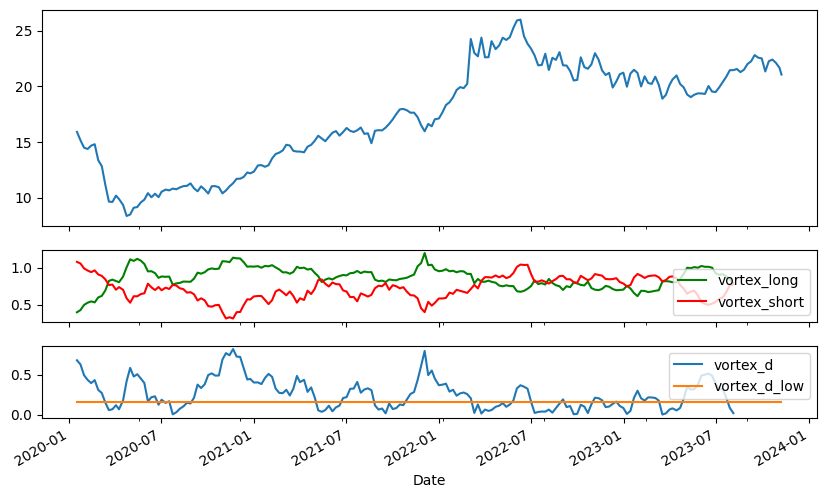

In [52]:
# create chart with vortex

fig, axs = plt.subplots(3, sharex=True, gridspec_kw={'height_ratios': [3, 1, 1]}, figsize=(10,6))

df.head(200)['Close'].plot(ax=axs[0])

df.head(200)[['vortex_long','vortex_short']].plot(ax=axs[1], color={'vortex_short':'red','vortex_long':'green'})

df.head(200)[['vortex_d','vortex_d_low']].plot(ax=axs[2])

plt.show()

In [53]:
# run same strategy on new data (ishares commodity etf)

class Vortex_2(Strategy):

  def init(self):
    self.vortex_long = self.data.vortex_long
    self.vortex_short = self.data.vortex_short
    self.vortex_d = self.data.vortex_d
    self.vortex_d_low = self.data.vortex_d_low
    
  def next(self):
    if self.data.vortex_long > self.data.vortex_short and self.data.vortex_d > self.data.vortex_d_low:
      self.buy()
    if self.data.vortex_long < self.data.vortex_short and self.data.vortex_d > self.data.vortex_d_low:
      self.sell()
    if self.data.vortex_d < self.data.vortex_d_low:
      self.position.close()

bt = Backtest(df, Vortex_2, cash=50_000, commission=.002)
stats = bt.run()
print(stats)

Start                     2006-07-28 00:00:00
End                       2023-11-07 00:00:00
Duration                   6311 days 00:00:00
Exposure Time [%]                   73.089701
Equity Final [$]                28161916.0234
Equity Peak [$]                 28161916.0234
Return [%]                       56223.832047
Buy & Hold Return [%]              -57.497477
Return (Ann.) [%]                  485.645797
Volatility (Ann.) [%]               259.93884
Sharpe Ratio                         1.868308
Sortino Ratio                       25.845685
Calmar Ratio                        35.727979
Max. Drawdown [%]                  -13.592871
Avg. Drawdown [%]                   -3.173465
Max. Drawdown Duration      287 days 00:00:00
Avg. Drawdown Duration       43 days 00:00:00
# Trades                                  184
Win Rate [%]                        86.956522
Best Trade [%]                       55.60537
Worst Trade [%]                     -6.240148
Avg. Trade [%]                    

/tmp/ipykernel_59194/3968373626.py:19: UserWarning: Data index is not sorted in ascending order. Sorting.
  bt = Backtest(df, Vortex_2, cash=50_000, commission=.002)
